Using the sklearn breast cancer dataset, optimize a KNN algorithm to classify malignant v benign breast mass. Use GridSearchCV and RandomizedSearchCV to find the optimal KNN parameters.

(Created by An for Metis review)

In [73]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler                                                
import numpy as np
import pandas as pd

cancer = load_breast_cancer()
X, y = pd.DataFrame(cancer.data), cancer.target
X.columns = cancer.feature_names
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, random_state=0)

In [159]:
# Create a KNN classifer here. Set at least 4 parameters to a non-default value.

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, weights='distance',
                           algorithm='ball_tree', leaf_size=10, n_jobs=-1)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(score)

0.956140350877193


/Users/amhoang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


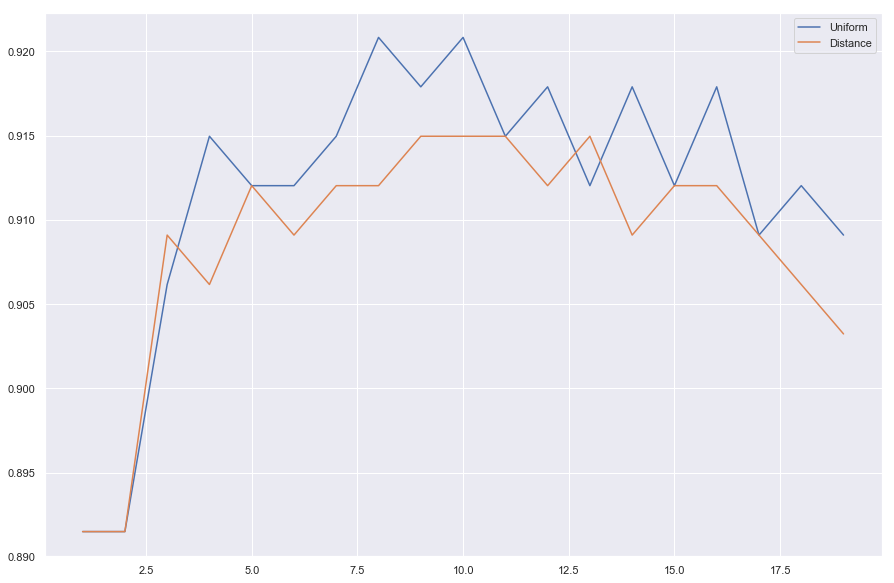

In [139]:
# Re-instantiate your classifer and search for best params with GridSearchCV
# (Optional: graph your results)

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

params = {'n_neighbors': [x for x in range(1,20)],
         'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, cv=5)
grid.fit(X_train, y_train)
results = grid.grid_scores_

n_neighbors = list(range(1, 20))
score_unif = []
score_dist = []
for r in results:
    p = r[0]
    mean = r[1]
    std = np.std(r[2])
    if p['weights'] == 'uniform':
        score_unif.append(mean)
    else:
        score_dist.append(mean)

f, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=n_neighbors, y=score_unif, ax=ax, label='Uniform')
sns.lineplot(x=n_neighbors, y=score_dist, ax=ax, label='Distance')

mean: 0.91202, std: 0.03036, params: {'weights': 'distance', 'n_neighbors': 16}
mean: 0.90909, std: 0.03060, params: {'weights': 'distance', 'n_neighbors': 14}
mean: 0.91202, std: 0.03129, params: {'weights': 'uniform', 'n_neighbors': 5}
mean: 0.91789, std: 0.02341, params: {'weights': 'uniform', 'n_neighbors': 12}
mean: 0.91202, std: 0.02720, params: {'weights': 'distance', 'n_neighbors': 15}
mean: 0.89150, std: 0.02940, params: {'weights': 'distance', 'n_neighbors': 2}
mean: 0.92082, std: 0.03474, params: {'weights': 'uniform', 'n_neighbors': 8}
mean: 0.91789, std: 0.03488, params: {'weights': 'uniform', 'n_neighbors': 16}
mean: 0.91202, std: 0.03730, params: {'weights': 'distance', 'n_neighbors': 7}
mean: 0.91202, std: 0.03274, params: {'weights': 'uniform', 'n_neighbors': 13}
mean: 0.90616, std: 0.03465, params: {'weights': 'distance', 'n_neighbors': 4}
mean: 0.91496, std: 0.02766, params: {'weights': 'distance', 'n_neighbors': 9}


/Users/amhoang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


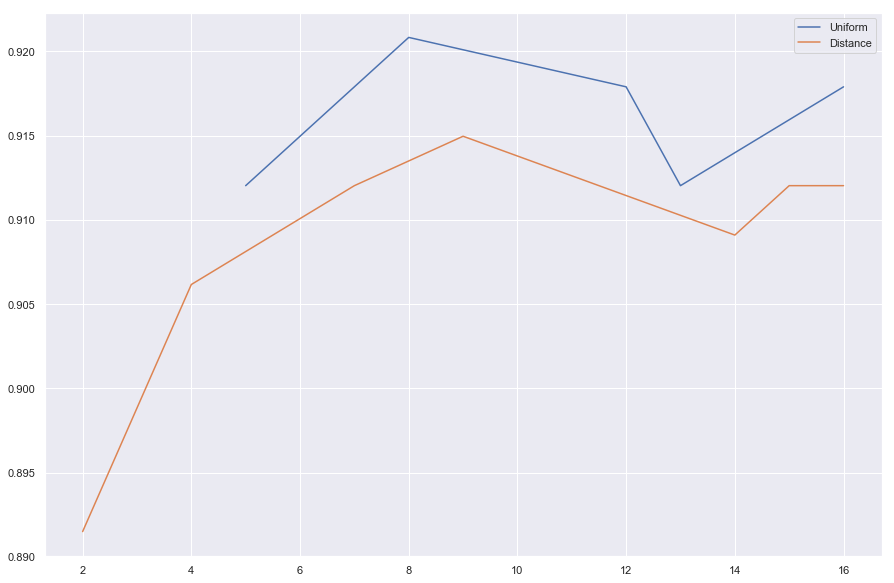

In [156]:
# Search for best params with RandomizedSearchCV
# (Optional: graph your results)

from sklearn.model_selection import RandomizedSearchCV

params = {'n_neighbors': [x for x in range(1,20)],
         'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
rand = RandomizedSearchCV(knn, params, cv=5, n_iter=12)
rand.fit(X_train, y_train)
results = rand.grid_scores_

neighbors_unif = []
neighbors_dist = []
score_unif = []
score_dist = []

for r in results:
    print(r)
    p = r[0]
    mean = r[1]
    std = np.std(r[2])
    if p['weights'] == 'uniform':
        neighbors_unif.append(p['n_neighbors'])
        score_unif.append(mean)
    else:
        neighbors_dist.append(p['n_neighbors'])
        score_dist.append(mean)

f, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=neighbors_unif, y=score_unif, ax=ax, label='Uniform')
sns.lineplot(x=neighbors_dist, y=score_dist, ax=ax, label='Distance')

In [157]:
# (Optional) Re-train classifer and score with optimal params

knn = KNeighborsClassifier(n_neighbors = 10, weights='uniform', n_jobs=-1)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(score)

0.9649122807017544
